In [22]:
%matplotlib inline
import numpy as np
from numpy import linalg


import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.size'] = 10
import matplotlib.pyplot as plt

from SpinWelle import SpinWave, PowderAverage
from rotation import Rx, Ry, Rz

# Zig-zag state on a honeycomb lattice


lat = SpinWave([np.sqrt(3)/2,1.5],[-np.sqrt(3)/2,1.5], [np.sqrt(3), 0], [0,3])

lat.set_dist_units(3.054,'Å')

lat.add_atom('a',(0,1))
lat.add_atom('b',(-np.sqrt(3)/2, 0.5))
lat.add_atom('c',(-np.sqrt(3)/2,-0.5))
lat.add_atom('d',(0,-1))
    

def Jx(J, K, G, Gp, **args):
    return np.array([[J+K, Gp, Gp],
                     [Gp,  J,  G ],
                     [Gp,  G,  J]])
def Jy(J, K, G, Gp, **args):
    return np.array([[J,   Gp,  G ],
                     [Gp, J+K, Gp ],
                     [G,   Gp,  J ]])
def Jz(J, K, G, Gp, **args):
    return np.array([[ J,   G,  Gp  ],
                     [ G,   J,  Gp  ],
                     [Gp,  Gp,  J+K ]])


# Coupling definition
lat.define_coupling('Jx')
lat.define_coupling('Jy')
lat.define_coupling('Jz')
lat.define_coupling('J2')
lat.define_coupling('J3')


lat.add_coupling('a', 'b', 'Jx', (-1, 0),color='green')
lat.add_coupling('d', 'c', 'Jx', (1, 0),color='green')

lat.add_coupling('a', 'b', 'Jy', (1, 0),color='red')
lat.add_coupling('c', 'd', 'Jy', (1, 0),color='red')

lat.add_coupling('b', 'c', 'Jz',(0,-1), color='blue')
lat.add_coupling('a', 'd', 'Jz',(0, 1), color='blue')

lat.add_coupling('a','d', 'J3', (0,-2), color='k')
lat.add_coupling('b','c', 'J3', (2,-1), color='k')
lat.add_coupling('c','b', 'J3', (2,1), color='k')

lat.add_coupling('b','c', 'J3', (0,2), color='k')
lat.add_coupling('a','d', 'J3', (-2,1), color='k')
lat.add_coupling('a','d', 'J3', (2,1), color='k')

r32 = np.sqrt(3)/2

lat.add_coupling('a','a', 'J2', (2*r32,0), color='orange')
lat.add_coupling('b','b', 'J2', (2*r32,0), color='orange')
lat.add_coupling('c','c', 'J2', (2*r32,0), color='orange')
lat.add_coupling('d','d', 'J2', (2*r32,0), color='orange')

lat.add_coupling('a','c', 'J2', (r32,1.5), color='orange')
lat.add_coupling('a','c', 'J2', (-r32,-1.5), color='orange')
lat.add_coupling('b','d', 'J2', (r32,1.5), color='orange')
lat.add_coupling('d','b', 'J2', (r32,1.5), color='orange')

lat.add_coupling('a','c', 'J2', (r32,-1.5), color='orange')
lat.add_coupling('a','c', 'J2', (-r32,1.5), color='orange')
lat.add_coupling('b','d', 'J2', (r32,-1.5), color='orange')
lat.add_coupling('d','b', 'J2', (r32,-1.5), color='orange')

In [2]:
def build_model(params, set_CGS=True):
    if set_CGS:
        ene, v = np.linalg.eigh( Jx(**params) + Jy(**params) - Jz(**params) - 3*params['J3']*np.eye(3) - 2*params['J2']*np.eye(3))

        v = v[:, np.argmin(ene)]

        lat.set_CGS('a', v)
        lat.set_CGS('b', v)
        lat.set_CGS('c', -v)
        lat.set_CGS('d', -v)
    
    lat.define_coupling('Jx', 0.5*Jx(**params))
    lat.define_coupling('Jy', 0.5*Jy(**params))
    lat.define_coupling('Jz', 0.5*Jz(**params))
    lat.define_coupling('J2', 0.5*params['J2']*np.eye(3))
    lat.define_coupling('J3', 0.5*params['J3']*np.eye(3))
    
#     print("Residuals:", lat.first_order_terms)
    

In [3]:
special_points_zz = {
    "X": [-1/2, 1/2],
    "$\Gamma$": [0,0],
    "Y": [1/2, 1/2],
    "$\Gamma'$": [1,0],
    "M" : [1/2,0],
    "$\Gamma $": [0, 0]
}

# lat.plot_BZ('hexagon2')
# lat.plot_BZ_path(special_points_zz)
# lat.plot_bandgraph(special_points_zz)
# lat.ax_KS.axis('off')
spec = PowderAverage(lat, gauss_broaden=0.135, intrinsic_broaden=0.2)



In [4]:
# taken from Chaloupka nad Khaliullin

su2 = [
        {'J': -1/3, 'J2': 0,'J3': 0, 'K': 0, 'G': 2/3, 'Gp': 2/3},
        {'J': -1, 'J2': 0,'J3': 0, 'K': 2, 'G': 0, 'Gp': 0},
        {'J': 0, 'J2': 0,'J3': 0, 'K': -1, 'G': -1, 'Gp': 0},
        {'J': -1/9, 'J2': 0,'J3': 0, 'K': -2/3, 'G': 8/9, 'Gp': -4/9},
        {'J': -2/3, 'J2': 0,'J3': 0, 'K': 1, 'G': 1/3, 'Gp': -2/3}
      ]
    


def dict_times(dic, a):
    rval = {}
    for l in dic:
        rval[l] = a*dic[l]
    return rval

def dict_plus(d1, d2):
    rval = d1.copy()
    for l in d2:
        rval[l] += d2[l]
    return rval


In [5]:

exp_cut_q = [0.4, 0.75, 1.3, 1.5]

exp_cut_data = [np.genfromtxt("CoTe/ansto_cuts/CoTe_0p05K_Q_%s_1.txt" % q) for q in "0p40 0p75 1p30 1p50".split()]
    
exp_min_E = 0.3

egrid=np.linspace(0,2.6,100)



npoints=1000

    

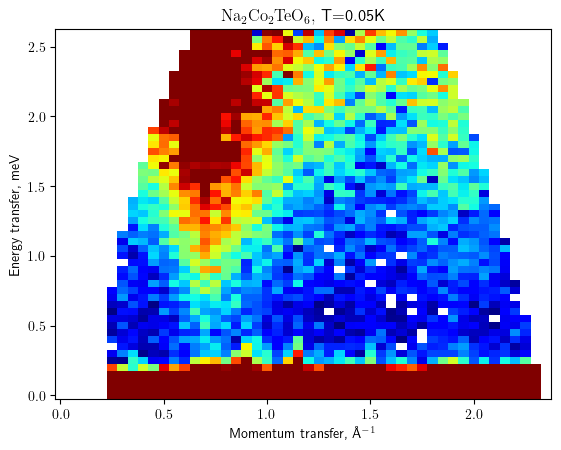

In [6]:
raw_ansto = np.genfromtxt("CoTe/ansto_raw/CoTe_0p05K_4p69ang_sqw.txt")

unc_matrix = raw_ansto[raw_ansto.shape[0]//2:,:]
data_matrix = raw_ansto[:raw_ansto.shape[0]//2,:]

Q_ansto = data_matrix[0,1:]
E_ansto = data_matrix[1:,0]

data_ansto = data_matrix[1:,1:]
unc_ansto = unc_matrix[1:,1:]
min_idx = E_ansto.searchsorted(0)
max_Qidx= Q_ansto.searchsorted(2.4)

# crop everthhing
Q_ansto = Q_ansto[:max_Qidx]
E_ansto = E_ansto[min_idx:]

data_ansto = data_ansto[min_idx:,:max_Qidx]
unc_ansto = unc_ansto[min_idx:,:max_Qidx]


plt.pcolormesh(Q_ansto, E_ansto,np.ma.masked_where(data_ansto<=0, data_ansto),shading='nearest',cmap='jet',vmin=0,vmax=0.01)
plt.title(r'$\mathrm{Na}_2\mathrm{Co}_2\mathrm{TeO}_6,$ T=0.05K')
plt.xlabel('Momentum transfer, \AA$^{-1}$')
plt.ylabel('Energy transfer, meV')
def getxy_ansto(cmin, cmax):
    Y,X= np.where(np.logical_and(data_ansto>cmin,data_ansto<cmax))
    return Q_ansto[X], E_ansto[Y]

plt.savefig('clean_output/cote_lowE_raw.png')

In [7]:
spec.intrinsic_broaden = 0.2

Co_3d_q = np.array([0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.6,0.7, 0.8,0.9, 1, 1.1])*4*np.pi
# Co0_3d_j0 = [1, 0.9619, 0.8627, 0.7345, 0.6046, 0.4872, 0.3866, 0.3028, 0.2341, 0.1785, 0.1340, 0.0708, 0.0325, 0.0102, -0.0018, -0.0077, -0.0099]

CoII_3d_j0 = np.array([1.0000, 0.9773, 0.9134, 0.8193, 0.7086, 0.5942, 0.4856, 0.3881, 0.3041, 0.2338, 0.1763, 0.0934,
0.0429, 0.0139, -0.0016, -0.0092, -0.0122])

spec.set_form_factor_arr(Co_3d_q, CoII_3d_j0)

In [8]:
def pspace_search(param0, Xparam, Xrange, Yparam, Yrange, NUM_X = 20, NUM_Y = 20):
    chi2 =np.zeros((NUM_X,NUM_Y))
    X = np.linspace(Xrange[0], Xrange[1], NUM_X)
    Y = np.linspace(Yrange[0], Yrange[1], NUM_Y)

    q, e = np.meshgrid(Q_ansto, E_ansto)

    mask = np.logical_or(data_ansto<=0, e<0.4)

    masked_data = np.ma.masked_where(mask, data_ansto)
    normfact = np.mean(masked_data)

    params = param0.copy()

    lat.quiet=True

    for ix, x in enumerate(X):
        print(ix,'/',len(X))
        for iy, y in enumerate(Y):
            params[Xparam] = x
            params[Yparam] = y
    #         params['Gp'] = x-y
            build_model(params)
            try:
                spec.calc_paverage(E_ansto,Q_ansto,num_samples=400)
                masked_theory = np.ma.masked_where(mask, spec.form_factor(Q_ansto)*spec.S.T)
                masked_theory = normfact*masked_theory/np.mean(masked_theory)

                chi2[ix,iy] = np.sum((masked_theory - masked_data)**2/masked_data)
            except linalg.LinAlgError:
                chi2[ix,iy] = float('nan')



    fig, ax = plt.subplots(figsize = (4,3))
                

    c = ax.pcolormesh(X,Y, np.log(chi2.T),shading='nearest')
    ax.plot(param0[Xparam], param0[Yparam], 'o', label='current')
    if param0['K'] > 0:
        ax.plot(Ma_CoTe_AFM[Xparam], Ma_CoTe_AFM[Yparam], 'x', label='Ma AFM')
        ax.plot(Garlea_AFM[Xparam], Garlea_AFM[Yparam], '+', label='Garlea AFM')
    else:
        ax.plot(Ma_CoTe_FM[Xparam], Ma_CoTe_FM[Yparam], 'x', label='Ma FM')
        ax.plot(Garlea_FM[Xparam], Garlea_FM[Yparam], '+', label='Garlea FM')
        ax.plot(CStock_CoTe[Xparam], CStock_CoTe[Yparam], '*', label='Stock FM')

    fig.subplots_adjust(left=0.2, bottom=0.2)
    ax.set_xlabel(Xparam)
    ax.set_ylabel(Yparam)
#     ax.legend()
    ax.set_title(str(param0))
    fig.colorbar(c)
    s ='2dhunt/CoTe_%sv%s' % (Xparam, Yparam)
    for p in param0:
        if p == Xparam:
            s+= '_%s=[%.2f, %.2f]' % (p, Xrange[0], Xrange[1])
        elif p == Yparam:
            s+= '_%s=[%.2f, %.2f]' % (p, Yrange[0], Yrange[1])
        else:
            s+= '_%s=%.2f' % (p, param0[p])
    s += '.png'
    plt.savefig(s)
    return (X,Y, chi2)

In [9]:
npoints=10000

e1 = np.array([np.sqrt(1/6), -np.sqrt(1/2), np.sqrt(1/3)])
e2 = np.array([np.sqrt(1/6), np.sqrt(1/2), np.sqrt(1/3)])
e3 = np.array([-np.sqrt(2/3), 0, np.sqrt(1/3)])

lat.set_spin_basis([e1,e2,e3])
spec.intrinsic_broaden = 0.2

exp_cut_q = exp_cut_q[:3]
cut_dq = [0.1, 0.1, 0.1]

lat.set_spin_basis([e1, e2, e3])

Egrid = np.linspace(0,10,100)
spec.intrinsic_broaden=0.2

cmap = plt.cm.get_cmap('tab10')
def plot_cuts(p, mult, title='', dQ=0.1):
    build_model(p)
                
    spec.ax_cuts=None
    for Q, data in zip(exp_cut_q, exp_cut_data):
        col = cmap(Q/2)
        spec.plot_cut(Q, Egrid, dQ = dQ, use_ffactor=True, npoints=10000, color=col)
        
        i = Q_ansto.searchsorted(Q-dQ)
        I = Q_ansto.searchsorted(Q+dQ)

        mask = data[:,0].searchsorted( exp_min_E)
        spec.ax_cuts.errorbar(data[mask:,0], mult*data[mask:,1], yerr = mult*data[mask:,2],fmt='.', lw=0.5, ms=2.2, color=col ) 
        

    title += ' J={J}, K={K}, $\Gamma$={G}, $\Gamma\'$={Gp}, J2={J2}, J3={J3}'.format(**p)
    
    spec.ax_cuts.set_title(title)
    
    spec.ax_cuts.set_xlabel('Energy transfer, meV')
    spec.ax_cuts.set_ylabel('Intensity (arb. units)')
    spec.ax_cuts.legend()

In [11]:


CStock_CoTe = {'J': -0.1, 'J2': 0.3, 'J3': 0.9, 'K': -9, 'G': 1.8, 'Gp': 0.3}
Ma_CoTe_FM = {'J': -0.1, 'J2': 0, 'J3': 1.40, 'K': -7.4, 'G': -0.1, 'Gp': 0.05}
Garlea_FM = {'J': -0.2, 'J2': 0.05, 'J3': 1.2, 'K': -7, 'G': 0.02, 'Gp': -0.23}

Ma_CoTe_AFM = {'J': -1.5, 'J2': 0, 'J3': 1.50, 'K': 3.30, 'G': -2.8, 'Gp': 2.1}
Garlea_AFM = {'J': -3.2, 'J2': 0.1, 'J3': 1.2, 'K': 2.70, 'G': -2.9, 'Gp': 1.6}

# param_FM2 = {'J': -2, 'J2': 0.3, 'J3': 0.9, 'K': -6, 'G': 1.75, 'Gp': 0.3}
# param_FM3 = {'J': -0.1, 'J2': -0.05, 'J3': 1.2, 'K': -7.5, 'G': -0.6, 'Gp': -0.4}
# param_FM4 = {'J': 0.18, 'J2': -0.6, 'J3': 1.8, 'K': -7.5, 'G': 0.7, 'Gp': 0.2}
# param_FM5 = {'J': -1.2, 'J2': -0.2, 'J3': 2, 'K': -8.5, 'G': 0.7, 'Gp': 0.55}
# param_FM6 = {'J': -1.0, 'J2': 0.0, 'J3': 1.6, 'K': -7.0, 'G': 0.25, 'Gp': 0.05}
# param_FM7 = {'J': -0.1,  'J2': 0.0, 'J3': 1.6,'K': -7.0, 'G': 0.1, 'Gp': 0.0}
param_FM8 = {'J': -0.2, 'J2': -0.05, 'J3': 1.6, 'K': -7.0, 'G': 0.5, 'Gp': 0.15}

param_AFM = {'J': -3.5, 'J2': 0.1, 'J3': 1.4, 'K': 3.2, 'G': -3.0, 'Gp': 2}


0 / 40


<ipython-input-220-7c959ff9425a>:29: UserWarning: Warning: converting a masked element to nan.
  chi2[ix,iy] = np.sum((masked_theory - masked_data)**2/masked_data)


1 / 40
2 / 40
3 / 40
4 / 40
5 / 40
6 / 40
7 / 40
8 / 40
9 / 40
10 / 40
11 / 40
12 / 40
13 / 40
14 / 40
15 / 40
16 / 40
17 / 40
18 / 40
19 / 40
20 / 40
21 / 40
22 / 40
23 / 40
24 / 40
25 / 40
26 / 40
27 / 40
28 / 40
29 / 40
30 / 40
31 / 40
32 / 40
33 / 40
34 / 40
35 / 40
36 / 40
37 / 40
38 / 40
39 / 40


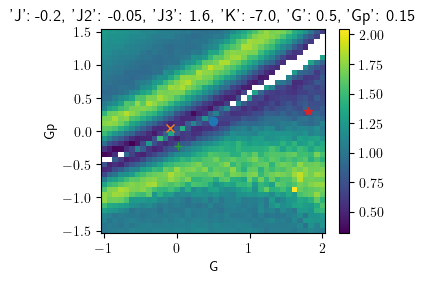

In [240]:
NX = 40
NY = 40

# # allowed regions according to Garlea
# pspace_search( param_FM8, 'K', (-10, -4), 'J', (-2,1),NUM_X=NX,NUM_Y=NY)
x,y,X2 = pspace_search( param_FM8, 'G', (-1, 2), 'Gp', (-1.5, 1.5),NUM_X=NX,NUM_Y=NY)
# pspace_search( param_FM8, 'J2', (-1, 1), 'J3', (0,2),NUM_X=NX,NUM_Y=NY)



In [241]:
np.save('tmp/fm8_ncto_X2fit.npy', X2)
np.save('tmp/fm8_ncto_G.npy', x)
np.save('tmp/fm8_ncto_Gp.npy', y)

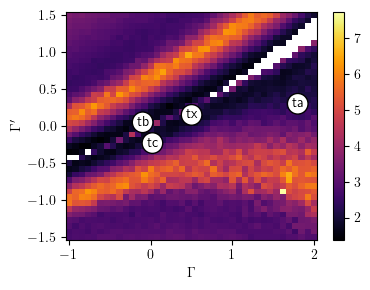

In [242]:
import matplotlib.colors as colors

fig, ax = plt.subplots(figsize=(4,3))
c = ax.pcolormesh(x,y,X2.T,
         # norm=colors.LogNorm(vmin=1, vmax=10),
                   cmap='inferno', shading='auto')



ax.set_xlabel(r'$\Gamma$')
ax.set_ylabel(r'$\Gamma^{\prime}$')

texts = [
    ax.text(CStock_CoTe['G'], CStock_CoTe['Gp'], 'ta', label='Stock FM',ha='center', va='center'),
    ax.text(Ma_CoTe_FM['G'], Ma_CoTe_FM['Gp'],   'tb', label='Ma FM',ha='center', va='center'),
    ax.text(Garlea_FM['G'], Garlea_FM['Gp'],     'tc', label='Garlea FM',ha='center', va='center'),
    ax.text(param_FM8['G'], param_FM8['Gp'], 'tx',ha='center', va='center')
        ]

for t in texts:
    t.set_bbox(dict(facecolor='white',boxstyle='circle'))

# gapless = np.load('tmp/gaplessncto-.npy')
# ax.plot(*gapless,'-',lw=4,color='#92bfe8')
# ax.legend()

fig.colorbar(c)
fig.tight_layout()
fig.savefig('clean_output/g_gp_2dhunt_FM.png',dpi=200)

0 / 40
1 / 40
2 / 40
3 / 40
4 / 40
5 / 40
6 / 40
7 / 40
8 / 40
9 / 40
10 / 40
11 / 40
12 / 40
13 / 40
14 / 40


<ipython-input-220-7c959ff9425a>:29: UserWarning: Warning: converting a masked element to nan.
  chi2[ix,iy] = np.sum((masked_theory - masked_data)**2/masked_data)


15 / 40
16 / 40
17 / 40
18 / 40
19 / 40
20 / 40
21 / 40
22 / 40
23 / 40
24 / 40
25 / 40
26 / 40
27 / 40
28 / 40
29 / 40
30 / 40
31 / 40
32 / 40
33 / 40
34 / 40
35 / 40
36 / 40
37 / 40
38 / 40
39 / 40


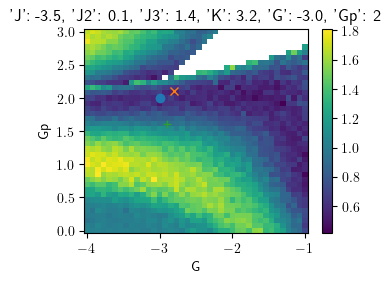

In [243]:
NX=40
NY=40

# pspace_search(Garlea_AFM, 'K', (2, 3.4), 'J', (-4.5,-1.3),NUM_X=NX,NUM_Y=NY)
# pspace_search(Garlea_AFM, 'G', (-4, -2), 'Gp', (0.5, 2.5),NUM_X=NX,NUM_Y=NY)
# pspace_search(Garlea_AFM, 'J2', (-0.7, 0.7), 'J3', (0.8,1.6),NUM_X=NX,NUM_Y=NY)

# pspace_search(Ma_CoTe_AFM, 'K', (2, 3.4), 'J', (-4.5,-1.3),NUM_X=NX,NUM_Y=NY)
# pspace_search(Ma_CoTe_AFM, 'G', (-4, -2), 'Gp', (0.5, 2.5),NUM_X=NX,NUM_Y=NY)
# pspace_search(Ma_CoTe_AFM, 'J2', (-0.7, 0.7), 'J3', (0.8,1.6),NUM_X=NX,NUM_Y=NY)

# pspace_search(param_AFM, 'K', (2, 3.4), 'J', (-4.5,-1.3),NUM_X=NX,NUM_Y=NY)
x_afm,y_afm,X2_afm = pspace_search(param_AFM, 'G', (-4, -1), 'Gp', (0, 3),NUM_X=NX,NUM_Y=NY)
# pspace_search(param_AFM, 'J2', (-0.7, 0.7), 'J3', (0.8,1.6),NUM_X=NX,NUM_Y=NY)

In [245]:
np.save('tmp/afm_ncto_X2fit.npy', X2_afm)
np.save('tmp/afm_ncto_G.npy', x_afm)
np.save('tmp/afm_ncto_Gp.npy', y_afm)

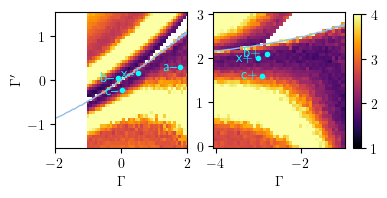

In [246]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(4,2))
c = ax2.pcolormesh(x_afm,y_afm,X2_afm.T, vmin=1,vmax=4,
         # norm=colors.LogNorm(vmin=1, vmax=10),
                   cmap='inferno', shading='auto')


c = ax1.pcolormesh(x,y,X2.T, vmin=1, vmax=4,
         # norm=colors.LogNorm(vmin=1, vmax=10),
                   cmap='inferno', shading='auto')

gapless = np.load('tmp/gaplessncto-.npy')
ax1.plot(*gapless,'-',lw=1,color='#92bfe8')
# ax.legend()


ax1.set_xlabel(r'$\Gamma$')
ax2.set_xlabel(r'$\Gamma$')
ax1.set_ylabel(r'$\Gamma^{\prime}$')
 



gapless = np.load('tmp/gaplessncto+.npy')
ax2.plot(*gapless,'-',lw=1,color='#92bfe8')
# ax.legend()
ax2.set_xlim([-4.05,-0.95])
ax1.set_xlim([-2,2])

fig.subplots_adjust(right=0.85,bottom=0.2)
cbar_ax = fig.add_axes([0.87, 0.2, 0.02, 0.67])
fig.colorbar(c, cax=cbar_ax)

p = dict(color='cyan', marker='.')
t = dict(ha='center', va='center', size=10,color='cyan')


pts = [
    ax1.plot(CStock_CoTe['G'], CStock_CoTe['Gp'],   **p),
    ax1.plot(Ma_CoTe_FM['G'], Ma_CoTe_FM['Gp'],     **p),
    ax1.plot(Garlea_FM['G'], Garlea_FM['Gp'],       **p),
    ax1.plot(param_FM8['G'], param_FM8['Gp'],       **p),
    ax2.plot(Ma_CoTe_AFM['G'], Ma_CoTe_AFM['Gp'],   **p),
    ax2.plot(Garlea_AFM['G'], Garlea_AFM['Gp'],     **p),
    ax2.plot(param_AFM['G'], param_AFM['Gp'],       **p)
        ]

dG = -0.31
dGp = 0.0

texts = [
    ax1.text(CStock_CoTe['G'] + dG, CStock_CoTe['Gp'] + dGp, 'a--', label='Stock FM',**t),
    ax1.text(Ma_CoTe_FM['G']  + dG, Ma_CoTe_FM['Gp']  + dGp,   'b--', label='Ma FM',**t),
    ax1.text(Garlea_FM['G']   + dG, Garlea_FM['Gp']   + dGp,     'c--', label='Garlea FM',**t),
    ax1.text(param_FM8['G']   + dG, param_FM8['Gp']   + dGp,     'x--',**t),
    ax2.text(Ma_CoTe_AFM['G'] + dG, Ma_CoTe_AFM['Gp'] + dGp,   'b+', label='Ma FM',**t),
    ax2.text(Garlea_AFM['G']  + dG, Garlea_AFM['Gp']  + dGp,     'c+', label='Garlea FM',**t),
    ax2.text(param_AFM['G']   + dG, param_AFM['Gp']   + dGp, 'x+',**t)
        ]






#     t.set_bbox(dict(facecolor='white',boxstyle='circle',alpha=0.8,pad=0.2,edgecolor='none'))

# fig.colorbar(c, cax=ax3)
# fig.tight_layout()
fig.savefig('clean_output/g_gp_2dhunt.png',dpi=200)

In [ ]:
import matplotlib.colors as colors

fig, ax = plt.subplots(figsize=(4,3))
c = ax.pcolormesh(x,y,X2.T,
         # norm=colors.LogNorm(vmin=1, vmax=10),
                   cmap='inferno', shading='auto')



ax.set_xlabel(r'$\Gamma$')
ax.set_ylabel(r'$\Gamma^{\prime}$')

texts = [
    ax.text(CStock_CoTe['G'], CStock_CoTe['Gp'], 'ta', label='Stock FM',ha='center', va='center'),
    ax.text(Ma_CoTe_FM['G'], Ma_CoTe_FM['Gp'],   'tb', label='Ma FM',ha='center', va='center'),
    ax.text(Garlea_FM['G'], Garlea_FM['Gp'],     'tc', label='Garlea FM',ha='center', va='center'),
    ax.text(param_FM8['G'], param_FM8['Gp'], 'tx',ha='center', va='center')
        ]

for t in texts:
    t.set_bbox(dict(facecolor='white',boxstyle='circle'))

gapless = np.load('tmp/gaplessncto+.npy')
ax.plot(*gapless,'-',lw=4,color='#92bfe8')
# ax.legend()

fig.colorbar(c)
fig.tight_layout()
fig.savefig('clean_output/g_gp_2dhunt_+.png',dpi=200)

In [18]:
spec.intrinsic_broaden = 0.25

# par = {'J': -2, 'J2': 0.5, 'J3': 2.2, 'K': .6, 'G': .8, 'Gp': .2}
# par = {'J': -1.5, 'J2': 0.5, 'J3': 0.6, 'K': .6, 'G': .8, 'Gp': .2}
# par = dict_times(par,1.5)
# par = Ma_CoTe_AFM.copy()
# par = {'J': -1.2, 'K':-7.4, 'G':-0.1, 'Gp': 0.05, 'J2': 0.05, 'J3': 1.4}

# par = param_FM8.copy()

par = param_FM8.copy()


par['J']=0.1
# par['K'] = 3.4
# par['G']=0
# par['Gp']=0
# par['J3']=1.4
par['J2']=0

{'J': 0.1, 'J2': 0, 'J3': 1.6, 'K': -7.0, 'G': 0.5, 'Gp': 0.15}


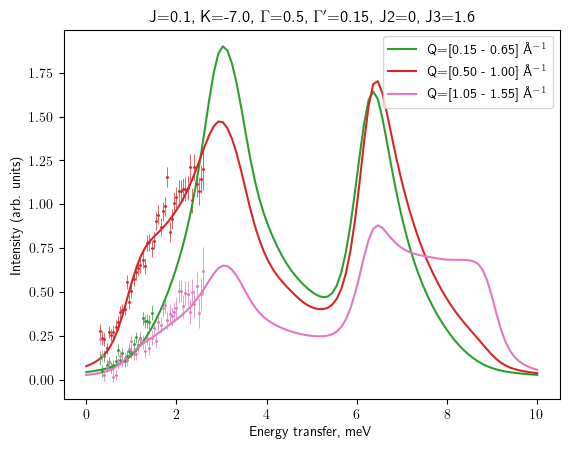

In [20]:
print(par)
plot_cuts(par, 90,dQ=0.25)

# plt.gca().set_title('')
# if par['K'] > 0:
#     plt.gca().text(4,1.5, '$K>0$',size='large')
#     plt.savefig('clean_output/CoTe_cuts_AFM')
# else:
#     plt.gca().text(4,1.5, '$K<0$',size='large')
#     plt.savefig('clean_output/CoTe_cuts_FM')

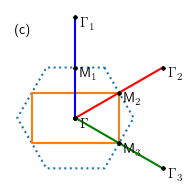

In [97]:
# path = {
#     "$\Gamma'$": (1,1),
#     "Y": (-1/2, -1/2),
#     "$\Gamma$": (0,0),
#     "M": (0, 1/2),
#     "$\Gamma$''": (0,1)
# }
lat.plot_BZ(plot_LBZ=True, unitcell='hexagon2')

pY = {
    "$\Gamma$  ": (0,0),
    "M$_1$": (1/2, 1/2),
    "$\Gamma_1$": (1, 1)
}

pM1 = {
    " ": (0, 0),
    "M$_2$": (1/2, 0),
    "$\Gamma_2$": (1, 0)
}

pM2 = {
    " ": (0, 0),
    "M$_3$": (0, -1/2),
    "$\Gamma_3$": (0, -1)
}

lat.plot_BZ_path(pY, color='b')
lat.plot_BZ_path(pM1, color='r')
lat.plot_BZ_path(pM2, color='g')
lat.ax_KS.axis('off')
lat.fig_KS.set_size_inches(2,2)
plt.text(-2.,3.5,'(c)')
plt.gcf().savefig('clean_output/BZ_walk')


# lat.plot_ffactor(path,'perp')
# plt.gcf().set_size_inches((4,2.5))
# plt.gca().set_ylim([0,6])
# if par['K'] > 0:
#     plt.gca().text(2.5,0.2, '$K>0$',color='white')
#     plt.savefig('clean_output/CoTe_specslice_AFM')
# else:
#     plt.gca().text(2.5,0.2, '$K<0$',color='white')
#     plt.savefig('clean_output/CoTe_specslice_FM')


(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)
(1000, 2)


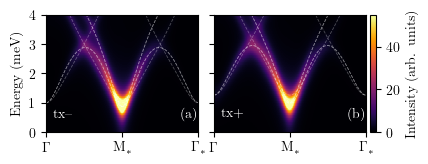

In [29]:
# calculate the domain averaged form-factor
from SpinWelle import parameterised_path
from scipy.special import voigt_profile


cmap = 'inferno'

num_E = 500

evec = np.linspace(0, 12, num_E)

stdev = 0.135
gamma = 0.2

Egrid = np.outer(np.ones(1000),evec)
Spec = np.zeros_like(Egrid)

tel = []

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (5, 2.5),sharey=True)
# ax2 = fig.add_axes([0.5,0.5,0.2,0.2])

## FM

par = param_FM8.copy()
build_model(par)

for path in [{"$\Gamma$": (0, 0),"  ":(0,1)},{" ": (0, 0),"  ":(1,0)},{"0": (0, 0),"0.5":(1/2,1/2),"1":(1,1)}]:

    k, t = parameterised_path(path, lat.reciprocal_vectors)
    T= np.linspace(0,t[-1],1000)
    K = k(T)

    E,S = lat.get_perp_ffactor(K)
    E = np.real(E)
    S = np.real(S)


    permute = np.argsort(E,axis=1)
    E = np.take_along_axis(E, permute, axis=1)[:, lat.natoms:]
    S = np.take_along_axis(S, permute, axis=1)[:, lat.natoms:]


    onevec = np.ones_like(T)

    for i in range(lat.natoms):
        Spec += voigt_profile(Egrid-np.outer(E[:,i],np.ones(num_E)),stdev, gamma)*np.outer(S[:,i],np.ones(num_E))

    tel.append((T,E))
    F2 = spec.form_factor(np.linalg.norm(K,axis=1))**2
    
#     ax2.plot(*K.T)

CB = ax1.pcolormesh(T,evec,F2*Spec.T,shading='nearest', cmap=cmap,  vmin=0, vmax=28)
        
for T, E in tel:
    ax1.plot(T, E, '--',color='white',lw=0.6,alpha=0.3)


ax1.set_ylabel('Energy (meV)')
# ax1.set_xlabel('h (r.l.u.)')
# ax1.set_xticks(t)
# ax1.set_xticklabels(labels = [0,0.5,1])


### AFM

tel = []
par = param_AFM.copy()
build_model(par)

for path in [{"$\Gamma$": (0, 0),"  ":(0,1)},{" ": (0, 0),"  ":(1,0)},{"0": (0, 0),"0.5":(1/2,1/2),"1":(1,1)}]:

    k, t = parameterised_path(path, lat.reciprocal_vectors)
    T= np.linspace(0,t[-1],1000)
    K = k(T)

    E,S = lat.get_perp_ffactor(K)
    E = np.real(E)
    S = np.real(S)


    permute = np.argsort(E,axis=1)
    E = np.take_along_axis(E, permute, axis=1)[:, lat.natoms:]
    S = np.take_along_axis(S, permute, axis=1)[:, lat.natoms:]


    onevec = np.ones_like(T)

    for i in range(lat.natoms):
        Spec += voigt_profile(Egrid-np.outer(E[:,i],np.ones(num_E)),stdev, gamma)*np.outer(S[:,i],np.ones(num_E))

    tel.append((T,E))
    
#     ax2.plot(*K.T)

CB = ax2.pcolormesh(T,evec,F2*Spec.T,shading='nearest', cmap = cmap, vmin=0, vmax=55)
        
for T, E in tel:
    ax2.plot(T, E, '--',color='white',lw=0.6,alpha=0.3)

# ax2.set_ylabel('Energy (meV)')
# ax2.set_xlabel('h (r.l.u.)')
ax1.set_xticks(t)
ax2.set_xticks(t)
ax1.set_xticklabels(labels = [r'$\Gamma$',r'M$_*$',r'$\Gamma_*$'])
ax2.set_xticklabels(labels = [r'$\Gamma$',r'M$_*$',r'$\Gamma_*$'])

# fig.colorbar(CB)
fig.set_size_inches(4,2.2*2/3)
ax1.set_ylim([0,4])
ax2.set_ylim([0,4])

cax = fig.add_axes([0.91, 0.15, 0.015, 0.8])
plt.subplots_adjust(left=0.1, bottom=0.15, wspace=0.1,top=0.95,right=0.9)
plt.colorbar(CB, cax = cax)
cax.set_ylabel('Intensity (arb. units)')
ax1.text(0.2, 0.5,'tx--',color='white')
ax1.text(3.7, 0.5,'(a)',color='white')
ax2.text(0.2, 0.5,'tx+',color='white')
ax2.text(3.7, 0.5,'(b)',color='white')

# plt.tight_layout()

plt.savefig('clean_output/CoTe_crystal', dpi=200)

In [230]:
par = param_AFM.copy()

build_model(par)
Egrid = np.linspace(0,12,100)
Qgrid = np.linspace(0.01,4.65,100)
spec.calc_paverage(Egrid, Qgrid, num_samples=5000)

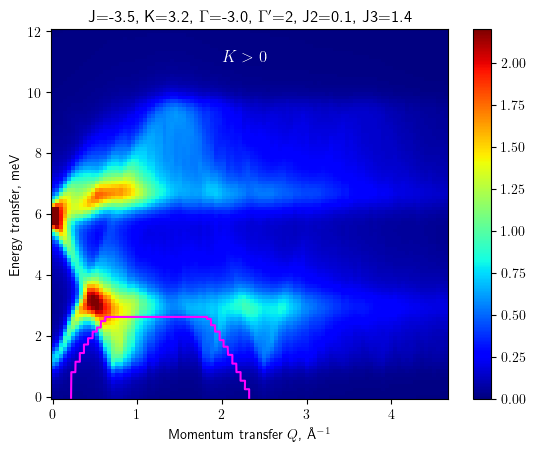

In [231]:
spec.plot_paverage(logscale=False,vmax=2.2,vmin=0, use_ffactor=True)
# spec.plot_paverage(logscale=True,vmax=1,vmin=-4)
ax = plt.gca()
ax.set_title('J={J}, K={K}, $\Gamma$={G}, $\Gamma\'$={Gp}, J2={J2}, J3={J3}'.format(**par))
edge = np.genfromtxt('../edge_location.csv',delimiter=',')
ax.plot(*edge.T,'magenta')
if par['K'] > 0:
    plt.gca().text(2,11, '$K>0$',size='large',color='white')
    plt.savefig('clean_output/CoTe_spec_AFM.png')
else:
    plt.gca().text(2,11, '$K<0$',size='large', color='white')
    plt.savefig('clean_output/CoTe_spec_FM.png')


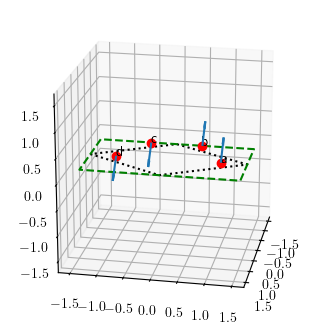

In [37]:
build_model(param_AFM)
# print(param_FM8)
def peval(K,G,Gp,**args):
    return np.linalg.eigh(np.array([[K,2*Gp-G, G],[2*Gp-G, K, G],[G,G,-K]]))

# print(peval(**param_FM8))

lat.plot_atoms()
lat.ax_RS.azim=11
lat.ax_RS.elev=20
# np.arccos(np.dot(lat.get_CGS('a'),1/np.sqrt(6)*np.array([-1,-1,2])))*180/np.pi

In [ ]:
spec.calc_paverage(np.linspace(0,10,100),np.linspace(0,2.25,100))
spec.plot_paverage()

In [ ]:
def pprint(params):
    print('{J} & {K} & {G} & {Gp} & {J2} & {J3}'.format(**params))
pprint(CStock_CoTe)
pprint(Ma_CoTe_FM)
pprint(Ma_CoTe_AFM)
pprint(Garlea_FM)
pprint(Garlea_AFM)

-0.1 & -9 & 1.8 & 0.3 & 0.3 & 0.9
-0.1 & -7.4 & -0.1 & 0.05 & 0 & 1.4
-1.5 & 3.3 & -2.8 & 2.1 & 0 & 1.5
-0.2 & -7 & 0.02 & -0.23 & 0.05 & 1.2
-3.2 & 2.7 & -2.9 & 1.6 & 0.1 & 1.2


In [4]:
pprint(param_AFM)

-3.5 & 3.2 & -3.0 & 2 & 0.1 & 1.4


In [16]:
# Self duality

def dualise(J, K, G, Gp, J2, J3):
    q = {}
    
    q['J'] = J + 4 * (K - G + Gp)/9
    q['K'] = (-1*K + 4*G- 4*Gp)/3
    q['G'] = ( 4*K + 5*G + 5*Gp)/9
    q['Gp'] = (-2*K + 2*G + 7*Gp)/9
    q['J2'] = J2
    q['J3'] = J3
    return q

print('{J:.2f} & {K:.2f} & {G:.2f} & {Gp:.2f} & {J2:.2f} & {J3:.2f}'.format(**param_FM8))
print('{J:.2f} & {K:.2f} & {G:.2f} & {Gp:.2f} & {J2:.2f} & {J3:.2f}'.format(**dualise(**param_AFM)))

print('{J:.2f} & {K:.2f} & {G:.2f} & {Gp:.2f} & {J2:.2f} & {J3:.2f}'.format(**param_AFM))
print('{J:.2f} & {K:.2f} & {G:.2f} & {Gp:.2f} & {J2:.2f} & {J3:.2f}'.format(**dualise(**param_FM8)))


param_LiuCoSb = {'J': -0.5, 'J2': 0, 'J3': 0.15, 'K': -3.6, 'G': -0.1, 'Gp': 0.6}
print('{J:.2f} & {K:.2f} & {G:.2f} & {Gp:.2f} & {J2:.2f} & {J3:.2f}'.format(**param_LiuCoSb))

# print("  FM    ",param_FM8)
# print(" F(AFM) ",dualise(**param_AFM))


# print()
# print("  AFM  ", param_AFM)
# print(" F(FM) ", dualise(**param_FM8))


    

-0.20 & -7.00 & 0.50 & 0.15 & -0.05 & 1.60
0.14 & -7.73 & 0.87 & 0.18 & 0.10 & 1.40
-3.50 & 3.20 & -3.00 & 2.00 & 0.10 & 1.40
-3.47 & 2.80 & -2.75 & 1.78 & -0.05 & 1.60
-0.50 & -3.60 & -0.10 & 0.60 & 0.00 & 0.15
